<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/03_introduction_to_computer_vision_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which discover patterns in visual data. Such as the cameras of a self-driving car recognizing the car in front.



## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-16 16:24:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.207, 142.251.6.207, 172.217.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  39.6MB/s    in 2.6s    

2024-02-16 16:24:05 (39.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a machine learning project this means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak | head -10

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg


In [ ]:
import os

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames, in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's get the class names programmatically.

In [ ]:
# Get the class anmes programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the btarget image directory (we'll view imagews from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")

  return img

['904938.jpg']
Image shape (511, 512, 3)


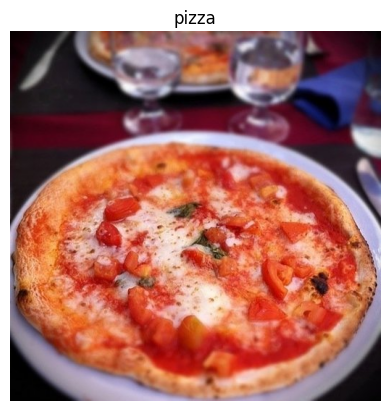

In [ ]:
# View a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(511, 512, 3), dtype=uint8, numpy=
array([[[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [3, 0, 0]],

       [[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [3, 0, 0]],

       [[5, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [3, 1, 2],
        [4, 0, 1],
        [3, 0, 0]],

       ...,

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape

(511, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.        , 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       [[0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.        , 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       [[0.01960784, 0.        , 0.        ],
        [0.02352941, 0.        , 0.        ],
        [0.02352941, 0.        , 0.        ],
        ...,
        [0.01176471, 0.00392157, 0.00784314],
        [0.01568627, 0.        , 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 155ms/step - loss: 0.6638 - accuracy: 0.5553 - val_loss: 0.6483 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5420 - accuracy: 0.7193 - val_loss: 0.4991 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4612 - accuracy: 0.7867 - val_loss: 0.3889 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4495 - accuracy: 0.7947 - val_loss: 0.4169 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3952 - accuracy: 0.8327 - val_loss: 0.3661 - val_accuracy: 0.8460


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if if works withour image data.

The model we're building is from tensorflow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 122ms/step - loss: 0.7259 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameter than our CNN (model 1), model_2 performs terribly... let's try again.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 2.6314 - accuracy: 0.6173 - val_loss: 0.6580 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6696 - accuracy: 0.7460 - val_loss: 0.5308 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4776 - accuracy: 0.7880 - val_loss: 0.4254 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.7337 - accuracy: 0.7207 - val_loss: 0.7275 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.5799 - accuracy: 0.7553 - val_loss: 0.5451 - val_accuracy: 0.7580


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
